<a href="https://colab.research.google.com/github/aminaougaddoum/code20me/blob/main/EV_Charging_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORT MODULES**

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## **Step 1 : Data Collection**

In [55]:
df_EV = pd.read_csv('sample_data/ev_charging_patterns.csv')
df_EV

User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0        User_1        BMW i3              108.463007         Station_391   
1        User_2  Hyundai Kona              100.000000         Station_428   
2        User_3    Chevy Bolt               75.000000         Station_181   
3        User_4  Hyundai Kona               50.000000         Station_327   
4        User_5  Hyundai Kona               50.000000         Station_108   
...         ...           ...                     ...                 ...   
1315  User_1316   Nissan Leaf              100.000000          Station_57   
1316  User_1317        BMW i3              100.000000          Station_40   
1317  User_1318   Nissan Leaf              100.000000         Station_374   
1318  User_1319    Chevy Bolt               85.000000         Station_336   
1319  User_1320   Nissan Leaf              120.447195         Station_128   

     Charging Station Location  Charging Start Time    Charging End Time  \
0                      Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1                San Francisco  2024-01-01 01:00:00  2024-01-01 03:01:00   
2                San Francisco  2024-01-01 02:00:00  2024-01-01 04:48:00   
3                      Houston  2024-01-01 03:00:00  2024-01-01 06:42:00   
4                  Los Angeles  2024-01-01 04:00:00  2024-01-01 05:46:00   
...                        ...                  ...                  ...   
1315                  New York  2024-02-24 19:00:00  2024-02-24 20:30:00   
1316                  New York  2024-02-24 20:00:00  2024-02-24 20:44:00   
1317                  New York  2024-02-24 21:00:00  2024-02-24 23:03:00   
1318             San Francisco  2024-02-24 22:00:00  2024-02-24 23:20:00   
1319               Los Angeles  2024-02-24 23:00:00  2024-02-24 23:56:00   

      Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0                 60.712346                   0.591363           36.389181   
1                 12.339275                   3.133652           30.677735   
2                 19.128876                   2.452653           27.513593   
3                 79.457824                   1.266431           32.882870   
4                 19.629104                   2.019765           10.215712   
...                     ...                        ...                 ...   
1315              42.011654                   1.426444            5.895475   
1316              68.185853                   3.238212           18.388012   
1317              18.895102                   3.267122           45.482066   
1318              13.756252                   2.754527           38.148183   
1319              63.652570                   3.740970           33.704226   

      Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  \
0               13.087717     Evening     Tuesday                  29.371576   
1               21.128448     Morning      Monday                  10.115778   
2               35.667270     Morning    Thursday                   6.854604   
3               13.036239     Evening    Saturday                  83.120003   
4               10.161471     Morning    Saturday                  54.258950   
...                   ...         ...         ...                        ...   
1315            22.081164     Evening      Sunday                  39.204102   
1316             5.067806     Evening     Tuesday                  31.456375   
1317            37.255002     Evening     Tuesday                  71.903081   
1318            39.046146   Afternoon      Sunday                  76.187997   
1319            10.863674     Evening      Monday                  59.338076   

      State of Charge (End %)  Distance Driven (since last charge) (km)  \
0                   86.119962                                293.602111   
1                   84.664344                                112.112804   
2                   69.917615                  

In [56]:
df_EV.head()

User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0  User_1        BMW i3              108.463007         Station_391   
1  User_2  Hyundai Kona              100.000000         Station_428   
2  User_3    Chevy Bolt               75.000000         Station_181   
3  User_4  Hyundai Kona               50.000000         Station_327   
4  User_5  Hyundai Kona               50.000000         Station_108   

  Charging Station Location  Charging Start Time    Charging End Time  \
0                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1             San Francisco  2024-01-01 01:00:00  2024-01-01 03:01:00   
2             San Francisco  2024-01-01 02:00:00  2024-01-01 04:48:00   
3                   Houston  2024-01-01 03:00:00  2024-01-01 06:42:00   
4               Los Angeles  2024-01-01 04:00:00  2024-01-01 05:46:00   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0              60.712346                   0.591363           36.389181   
1              12.339275                   3.133652           30.677735   
2              19.128876                   2.452653           27.513593   
3              79.457824                   1.266431           32.882870   
4              19.629104                   2.019765           10.215712   

   Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  \
0            13.087717     Evening     Tuesday                  29.371576   
1            21.128448     Morning      Monday                  10.115778   
2            35.667270     Morning    Thursday                   6.854604   
3            13.036239     Evening    Saturday                  83.120003   
4            10.161471     Morning    Saturday                  54.258950   

   State of Charge (End %)  Distance Driven (since last charge) (km)  \
0                86.119962                                293.602111   
1                84.664344                                112.112804   
2                69.917615                                 71.799253   
3                99.624328                                199.577785   
4                63.743786                                203.661847   

   Temperature (°C)  Vehicle Age (years)     Charger Type  \
0         27.947953                  2.0  DC Fast Charger   
1         14.311026                  3.0          Level 1   
2         21.002002                  2.0          Level 2   
3         38.316313                  1.0          Level 1   
4         -7.834199                  1.0          Level 1   

                User Type  
0                Commuter  
1           Casual Driver  
2                Commuter  
3  Long-Distance Traveler  
4  Long-Distance Traveler

In [57]:
df_EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [58]:
df_EV.describe()

Battery Capacity (kWh)  Energy Consumed (kWh)  \
count             1320.000000            1254.000000   
mean                74.534692              42.642894   
std                 20.626914              22.411705   
min                  1.532807               0.045772   
25%                 62.000000              23.881193   
50%                 75.000000              42.691405   
75%                 85.000000              61.206218   
max                193.003074             152.238758   

       Charging Duration (hours)  Charging Rate (kW)  Charging Cost (USD)  \
count                1320.000000         1254.000000          1320.000000   
mean                    2.269377           25.963003            22.551352   
std                     1.061037           14.011326            10.751494   
min                     0.095314            1.472549             0.234317   
25%                     1.397623           13.856583            13.368141   
50%                     2.258136           25.603799            22.076360   
75%                     3.112806           37.502998            31.646044   
max                     7.635145           97.342255            69.407743   

       State of Charge (Start %)  State of Charge (End %)  \
count                1320.000000              1320.000000   
mean                   49.130012                75.141590   
std                    24.074134                17.080580   
min                     2.325959                 7.604224   
25%                    27.786903                62.053266   
50%                    48.241771                75.682496   
75%                    69.277921                88.201370   
max                   152.489761               177.708666   

       Distance Driven (since last charge) (km)  Temperature (°C)  \
count                               1254.000000       1320.000000   
mean                                 153.596788         15.263591   
std                                   86.004987         14.831216   
min                                    0.862361        -10.724770   
25%                                   79.445335          2.800664   
50%                                  152.259867         14.630846   
75%                                  226.073284         27.981810   
max                                  398.364775         73.169588   

       Vehicle Age (years)  
count          1320.000000  
mean              3.612843  
std               2.309824  
min               0.000000  
25%               2.000000  
50%               4.000000  
75%               6.000000  
max              11.688592

In [59]:
df_EV.shape

(1320, 20)

In [60]:
df_EV.columns

Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')

In [61]:
df_EV.isnull().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

In [62]:
#Total number of missing values
df_EV.isnull().sum().sum()

198

## **Step 2 : Data Cleaning**

In [63]:
#Dealing with missing values
#Fill with means because the missing data is random and you don't want to lose information

energy_consumed_median = df_EV['Energy Consumed (kWh)'].median()
df_EV['Energy Consumed (kWh)'].fillna(energy_consumed_median, inplace=True)

charging_rate_median = df_EV['Charging Rate (kW)'].median()
df_EV['Charging Rate (kW)'].fillna(charging_rate_median, inplace=True)

distance_driven_median = df_EV['Distance Driven (since last charge) (km)'].median()
df_EV['Distance Driven (since last charge) (km)'].fillna(distance_driven_median, inplace=True)

df_EV.isnull().sum()


User ID                                     0
Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station ID                         0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
dtype: int64

In [64]:
#Duplicated value
df_EV.duplicated().sum()

0

In [65]:
#Unique value
df_EV.nunique()

User ID                                     1320
Vehicle Model                                  5
Battery Capacity (kWh)                       147
Charging Station ID                          462
Charging Station Location                      5
Charging Start Time                         1320
Charging End Time                           1309
Energy Consumed (kWh)                       1255
Charging Duration (hours)                   1320
Charging Rate (kW)                          1255
Charging Cost (USD)                         1320
Time of Day                                    4
Day of Week                                    7
State of Charge (Start %)                   1320
State of Charge (End %)                     1320
Distance Driven (since last charge) (km)    1255
Temperature (°C)                            1320
Vehicle Age (years)                          114
Charger Type                                   3
User Type                                      3
dtype: int64

## **Step 3 : Univariante Analysis**

In [66]:
#Choose one variant to analyze

vehicle_model_count = df_EV['Vehicle Model'].value_counts()
vehicle_model_count

Vehicle Model
Tesla Model 3    280
Hyundai Kona     266
Nissan Leaf      260
BMW i3           258
Chevy Bolt       256
Name: count, dtype: int64

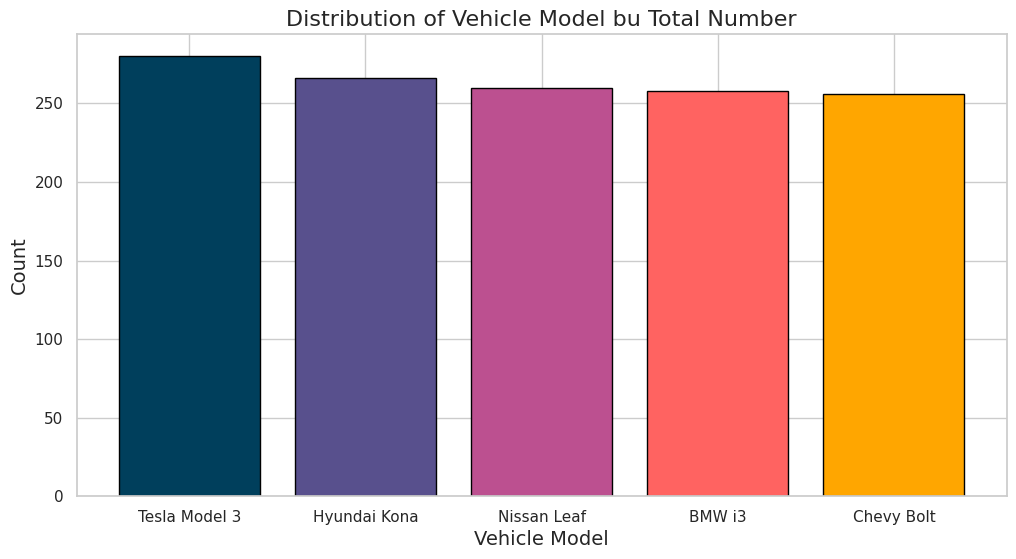

In [67]:
#Visualization

colors=['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']

plt.figure(figsize=(12,6))
plt.bar(vehicle_model_count.index, vehicle_model_count.values, color=colors[:len(vehicle_model_count)], edgecolor='black')


# Add labels and title
plt.title('Distribution of Vehicle Model bu Total Number', fontsize=16)
plt.xlabel('Vehicle Model', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)

plt.show()

In [68]:
#Same for charging station location
charge_location_count = df_EV['Charging Station Location'].value_counts()
charge_location_count

Charging Station Location
Los Angeles      297
San Francisco    264
Houston          262
New York         255
Chicago          242
Name: count, dtype: int64

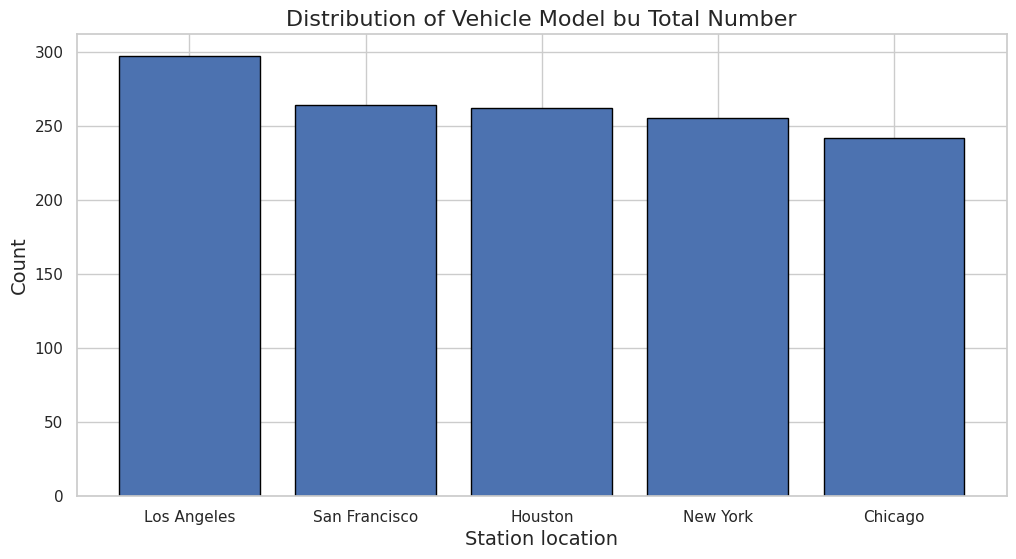

In [69]:
#Visualization

plt.figure(figsize=(12,6))
plt.bar(charge_location_count.index, charge_location_count.values, edgecolor='black')


# Add labels and title
plt.title('Distribution of Vehicle Model bu Total Number', fontsize=16)
plt.xlabel('Station location',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=0)

plt.show()

In [70]:
df_EV['Time of Day'].value_counts()

Time of Day
Evening      362
Morning      336
Night        312
Afternoon    310
Name: count, dtype: int64

### As shown on the table above most people charge their vehicle during evening.

In [71]:
evening_charge = df_EV[df_EV['Time of Day']=='Evening']['Time of Day'].value_counts()
evening_charge

Time of Day
Evening    362
Name: count, dtype: int64

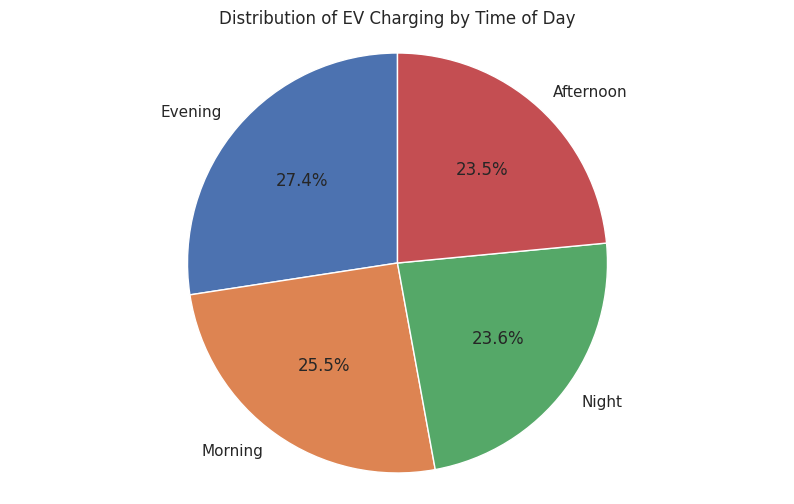

In [72]:
evening_charge = df_EV[df_EV['Time of Day']=='Evening']['Time of Day'].value_counts().values[0]
morning_charge = df_EV[df_EV['Time of Day']=='Morning']['Time of Day'].value_counts().values[0]
night_charge = df_EV[df_EV['Time of Day']=='Night']['Time of Day'].value_counts().values[0]
afternoon_charge = df_EV[df_EV['Time of Day']=='Afternoon']['Time of Day'].value_counts().values[0]

labels = ['Evening', 'Morning', 'Night', 'Afternoon']
values = [evening_charge, morning_charge, night_charge, afternoon_charge]

plt.figure(figsize=(10, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of EV Charging by Time of Day')
plt.axis('equal')

plt.show()

In [73]:
day_week_count = df_EV['Day of Week'].value_counts()
day_week_count

Day of Week
Saturday     205
Tuesday      200
Wednesday    197
Sunday       191
Friday       188
Monday       185
Thursday     154
Name: count, dtype: int64

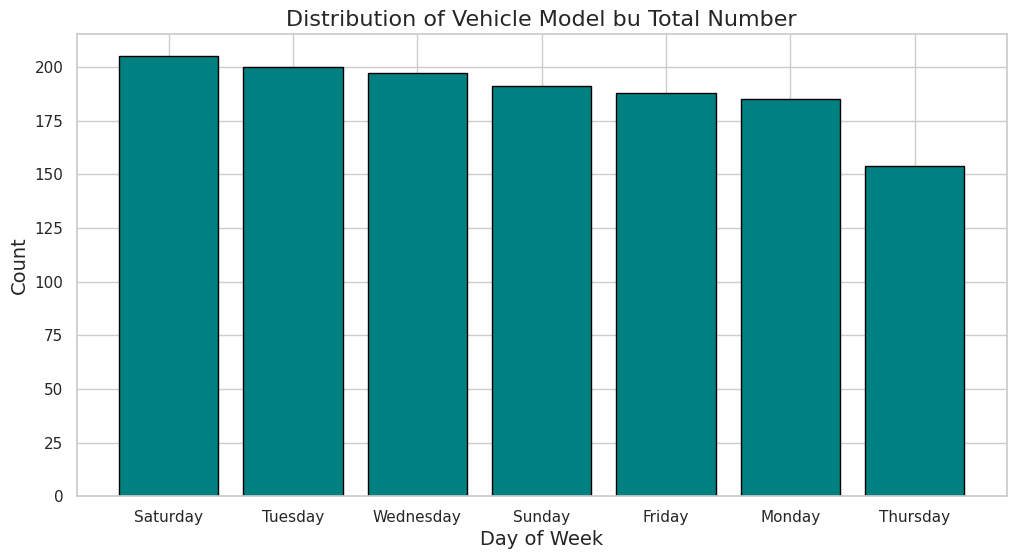

In [74]:
plt.figure(figsize=(10,6))
plt.bar(day_week_count.index, day_week_count.values, color ='teal', edgecolor='black')


# Add labels and title
plt.title('Distribution of Vehicle Model bu Total Number', fontsize=16)
plt.xlabel('Day of Week',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=0)

plt.show()

In [75]:
#Charger type
charger_type_count = df_EV['Charger Type'].value_counts()
charger_type_count

Charger Type
Level 1            459
Level 2            431
DC Fast Charger    430
Name: count, dtype: int64

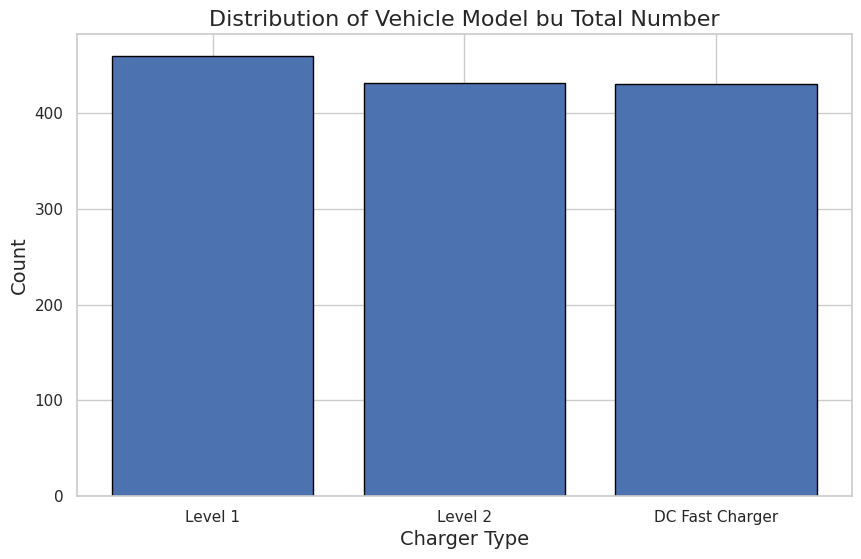

In [94]:
plt.figure(figsize=(10,6))
plt.bar(charger_type_count.index, charger_type_count.values, edgecolor='black')


# Add labels and title
plt.title('Distribution of Vehicle Model bu Total Number', fontsize=16)
plt.xlabel('Charger Type',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=0)

plt.show()

In [77]:
user_type_count = df_EV['User Type'].value_counts()
user_type_count

User Type
Commuter                  476
Long-Distance Traveler    437
Casual Driver             407
Name: count, dtype: int64

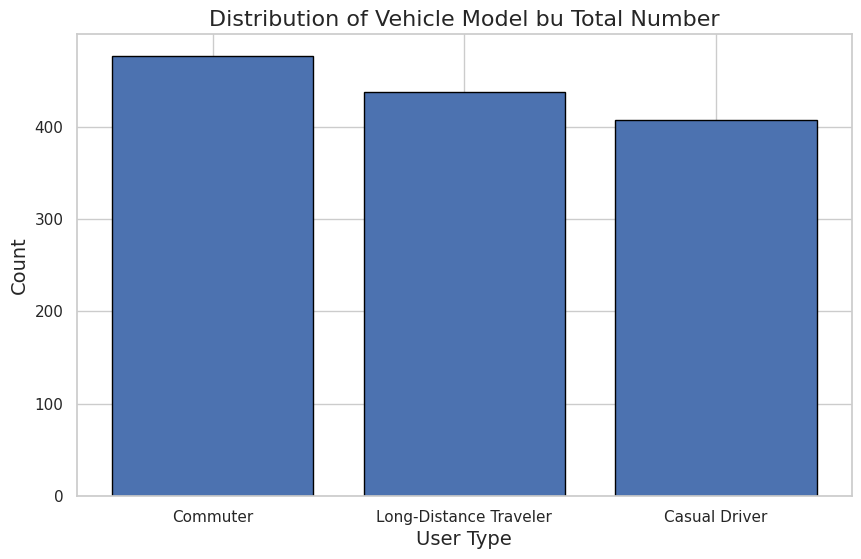

In [95]:
plt.figure(figsize=(10,6))
plt.bar(user_type_count.index, user_type_count.values, edgecolor='black')


# Add labels and title
plt.title('Distribution of Vehicle Model bu Total Number', fontsize=16)
plt.xlabel('User Type',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=0)

plt.show()

## **Distribution, of Charging Session**

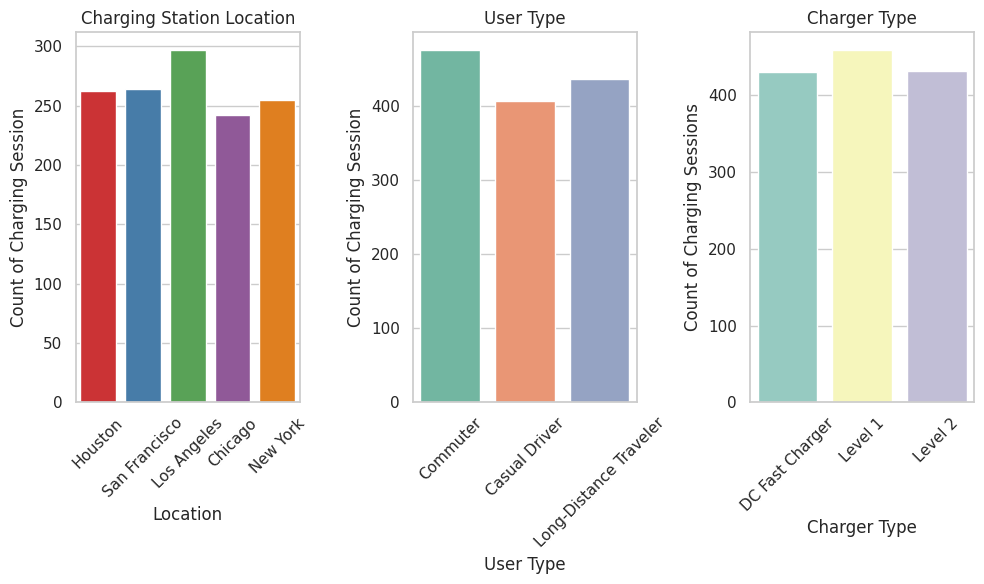

In [79]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1,3,figsize=(10, 6))

sns.countplot(ax=axes[0],data=df_EV,x='Charging Station Location', palette='Set1')
axes[0].set_title('Charging Station Location')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Count of Charging Session')
axes[0].tick_params(axis='x', rotation=45)


sns.countplot(ax=axes[1],data=df_EV,x='User Type', palette='Set2')
axes[1].set_title('User Type')
axes[1].set_xlabel('User Type')
axes[1].set_ylabel('Count of Charging Session')
axes[1].tick_params(axis='x', rotation=45)



sns.countplot(ax=axes[2],data=df_EV,x='Charger Type', palette='Set3')
axes[2].set_title('Charger Type')
axes[2].set_xlabel('Charger Type')
axes[2].set_ylabel('Count of Charging Sessions')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## **Step 4 : Bivariante Analysis**

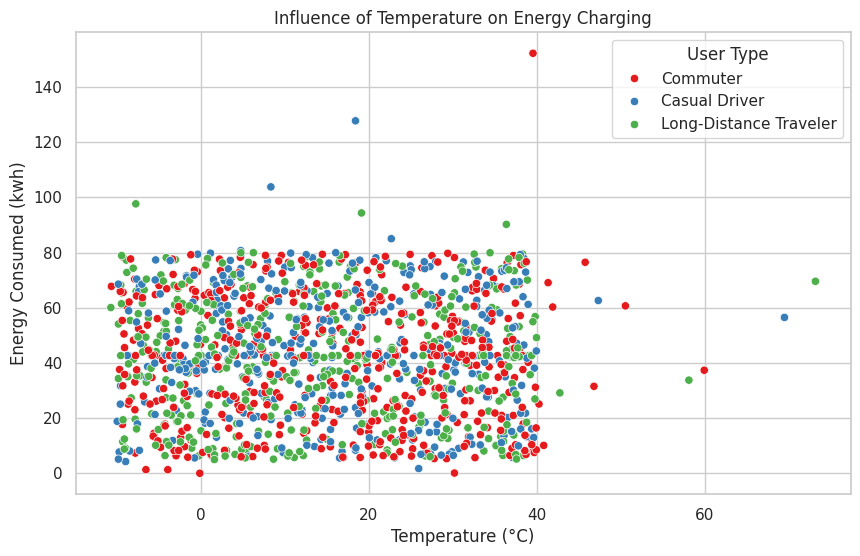

In [80]:
#Influence of Temperature on Energy Consumed

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_EV, x='Temperature (°C)', y='Energy Consumed (kWh)', hue='User Type',palette='Set1')
plt.title('Influence of Temperature on Energy Charging')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumed (kwh)')
plt.legend(title='User Type', loc='upper right')

plt.show()

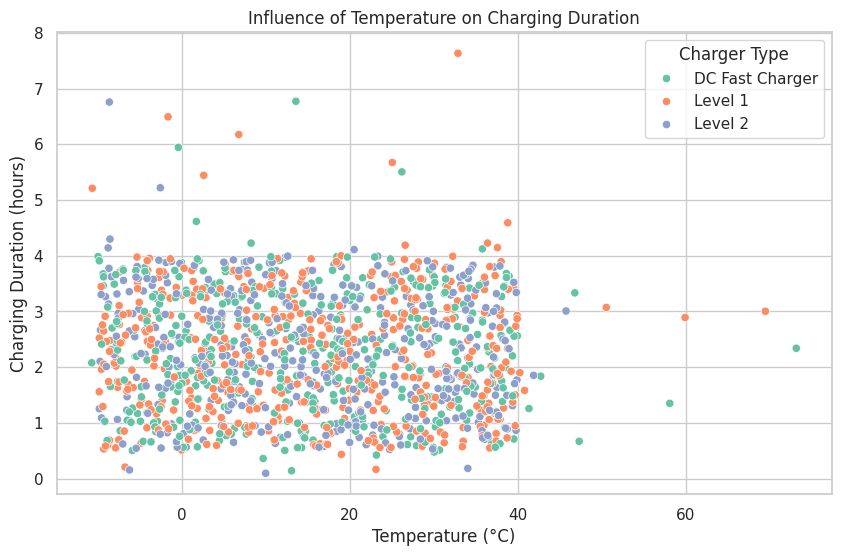

In [81]:
#Influence of Temperature on Charging Duration

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_EV, x='Temperature (°C)', y='Charging Duration (hours)', hue='Charger Type',palette='Set2')
plt.title('Influence of Temperature on Charging Duration')
plt.xlabel('Temperature (°C)')
plt.ylabel('Charging Duration (hours)')
plt.legend(title='Charger Type', loc='upper right')

plt.show()

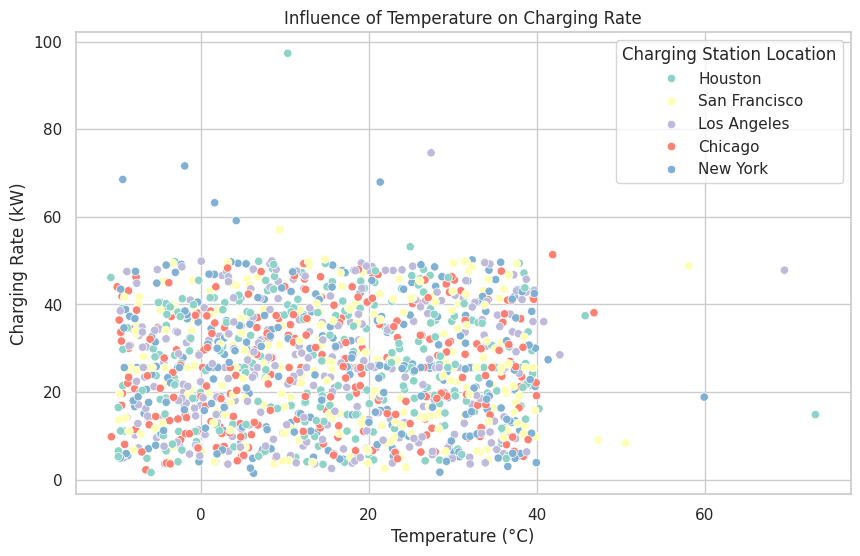

In [82]:
#Influence of Temperature on charging rate

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_EV, x='Temperature (°C)', y='Charging Rate (kW)', hue='Charging Station Location',palette='Set3')
plt.title('Influence of Temperature on Charging Rate')
plt.xlabel('Temperature (°C)')
plt.ylabel('Charging Rate (kW)')
plt.legend(title='Charging Station Location', loc='upper right')

plt.show()

### **Correlation between Charging cost, Enegy consumed and Charging duration**

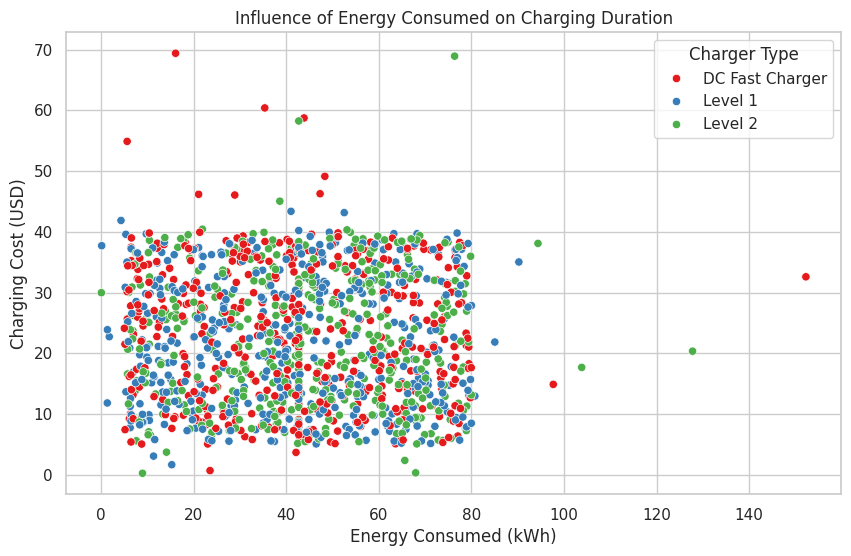

In [83]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_EV, x='Energy Consumed (kWh)', y='Charging Cost (USD)', hue='Charger Type',palette='Set1')
plt.title('Influence of Energy Consumed on Charging Duration')
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('Charging Cost (USD)')
plt.legend(title='Charger Type', loc='upper right')

plt.show()

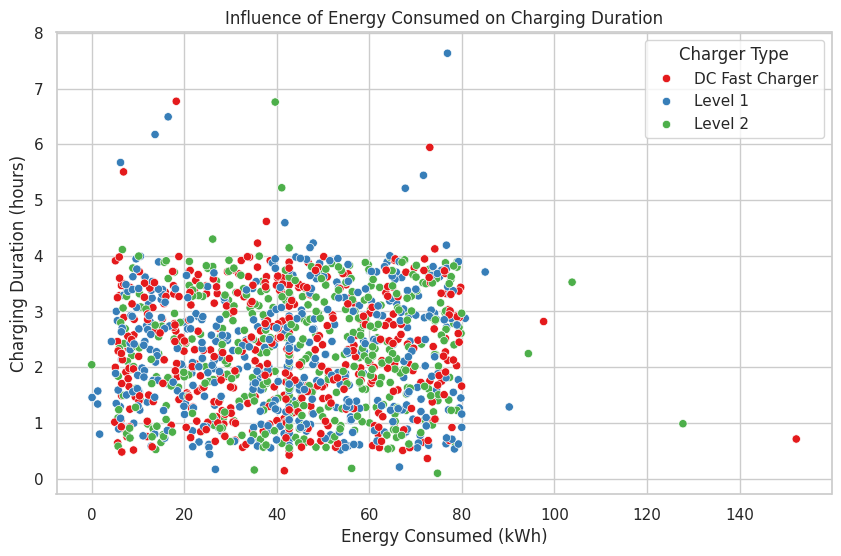

In [84]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_EV, x='Energy Consumed (kWh)', y='Charging Duration (hours)', hue='Charger Type',palette='Set1')
plt.title('Influence of Energy Consumed on Charging Duration')
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('Charging Duration (hours)')
plt.legend(title='Charger Type', loc='upper right')

plt.show()

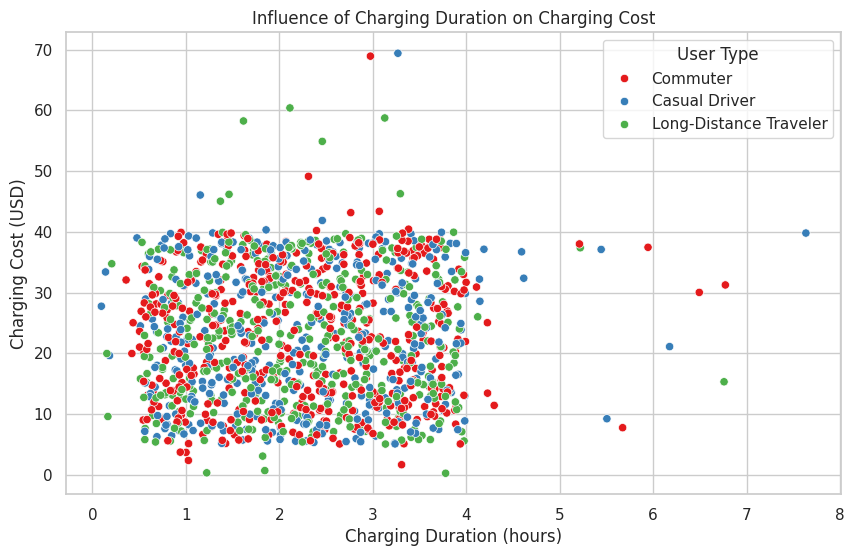

In [85]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_EV, x='Charging Duration (hours)', y='Charging Cost (USD)', hue='User Type',palette='Set1')
plt.title('Influence of Charging Duration on Charging Cost')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Charging Cost (USD)')
plt.legend(title='User Type', loc='upper right')

plt.show()

### The impact of Energy consumed and charging duration on charging cost

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
X = df_EV[['Energy Consumed (kWh)', 'Charging Duration (hours)']].dropna()
y = df_EV['Charging Cost (USD)']

In [88]:
#Linear Regression method

model = LinearRegression()
model.fit(X, y)

print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

print("Impact of Energy consumed on Charging cost : ", model.coef_[0])
print("Impact of Charging duration on Charging cost : ", model.coef_[1])

Intercept:  22.349528276095885
Coefficients:  [-0.00396263  0.16339768]
Impact of Energy consumed on Charging cost :  -0.003962627625894771
Impact of Charging duration on Charging cost :  0.16339767722614584


In [89]:
#Ridge method
from sklearn.linear_model import Ridge

X= df_EV[['Energy Consumed (kWh)', 'Charging Duration (hours)']].dropna()
y = df_EV['Charging Cost (USD)']

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)

print("Intercept: ", ridge_model.intercept_)
print("Coefficients: ", ridge_model.coef_)

print("Impact of Energy consumed on Charging cost : ", ridge_model.coef_[0])
print("Impact of Charging duration on Charging cost : ", ridge_model.coef_[1])

Intercept:  22.349771429811163
Coefficients:  [-0.00396247  0.16328763]
Impact of Energy consumed on Charging cost :  -0.00396247298049774
Impact of Charging duration on Charging cost :  0.16328762562392898


## **Engineering Tools**

In [91]:
#Define charging efficiency

df_EV['Charging Efficiency'] = df_EV['Energy Consumed (kWh)'] / df_EV['Charging Duration (hours)']
df_EV['Charging Efficiency'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_EV['Charging Start Time']= pd.to_datetime(df_EV['Charging Start Time'], errors='coerce')

df_EV['Hour']= df_EV['Charging Start Time'].dt.hour
df_EV['Day']= df_EV['Charging Start Time'].dt.day
df_EV['Day of Week']= df_EV['Charging Start Time'].dt.day_name()
df_EV['Month']= df_EV['Charging Start Time'].dt.month

df_EV[['Charging Efficiency', 'Hour', 'Day', 'Day of Week', 'Month']].head()


Charging Efficiency  Hour  Day Day of Week  Month
0           102.665033     0    1      Monday      1
1             3.937666     1    1      Monday      1
2             7.799260     2    1      Monday      1
3            62.741544     3    1      Monday      1
4             9.718509     4    1      Monday      1

from matplotlib import pyplot as plt
_df_0['Charging Efficiency'].plot(kind='hist', bins=20, title='Charging Efficiency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Hour'].plot(kind='hist', bins=20, title='Hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Charging Efficiency', y='Hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Hour']
  ys = series['Charging Efficiency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Hour', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Hour')
_ = plt.ylabel('Charging Efficiency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Hour']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Hour'}, axis=1)
              .sort_values('Hour', ascending=True))
  xs = counted['Hour']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Hour', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Hour')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Day']
  ys = series['Charging Efficiency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Day', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Day')
_ = plt.ylabel('Charging Efficiency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Day']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Day'}, axis=1)
              .sort_values('Day', ascending=True))
  xs = counted['Day']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Day', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Day')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['Charging Efficiency'].plot(kind='line', figsize=(8, 4), title='Charging Efficiency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Hour'].plot(kind='line', figsize=(8, 4), title='Hour')
plt.gca().spines[['top', 'right']].set_visible(False)

## **Charging Efficiency vs Charger Type**

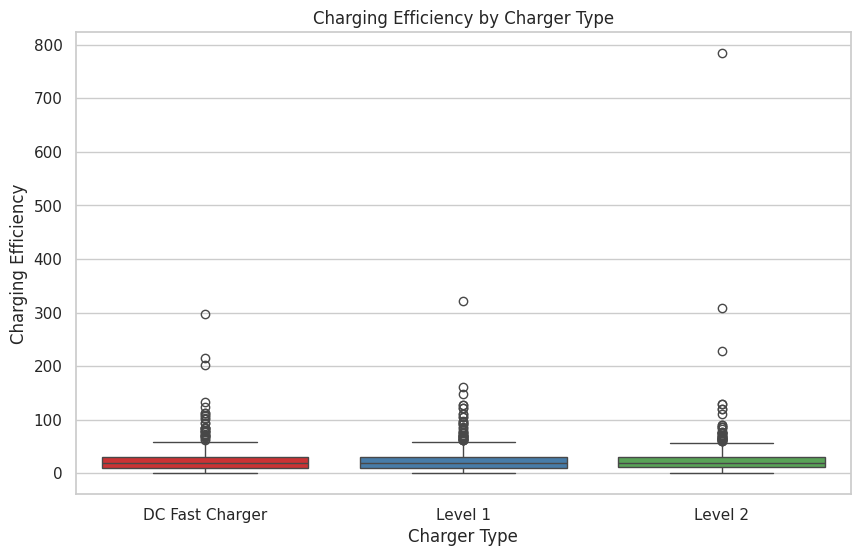

In [93]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_EV, x='Charger Type', y='Charging Efficiency', palette='Set1')
plt.title('Charging Efficiency by Charger Type')
plt.xlabel('Charger Type')
plt.ylabel('Charging Efficiency')

plt.show()

## **Charging Session by Time**

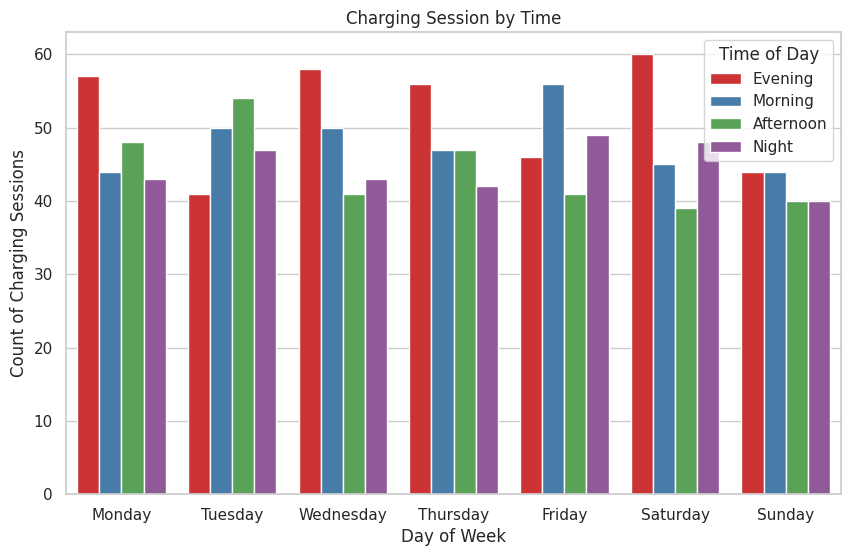

In [102]:
plt.figure(figsize=(10,6))

labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(data=df_EV, x='Day of Week', hue='Time of Day', palette='Set1')
plt.title('Charging Session by Time')
plt.xlabel('Day of Week')
plt.ylabel('Count of Charging Sessions')
plt.legend(title='Time of Day', loc='upper right')

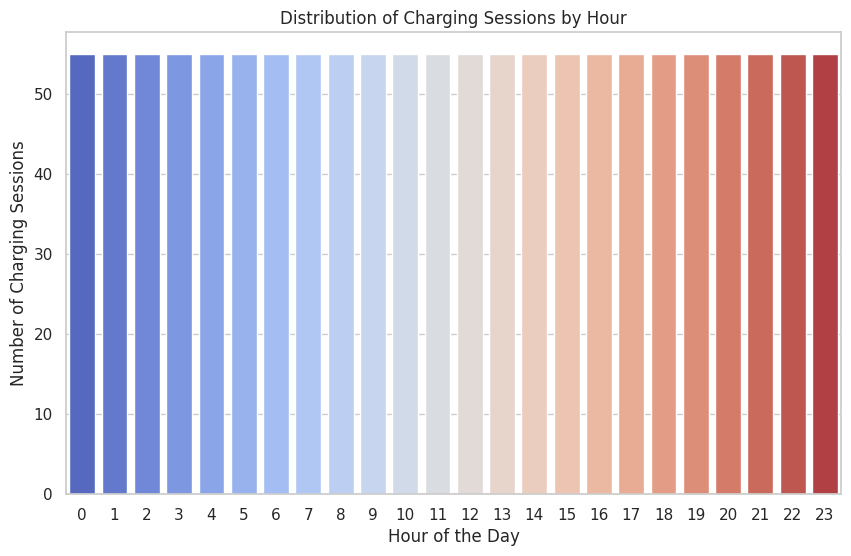

In [106]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_EV, x='Hour', palette='coolwarm')
plt.title('Distribution of Charging Sessions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Charging Sessions')
plt.show()

## **Correlation Heatmap**

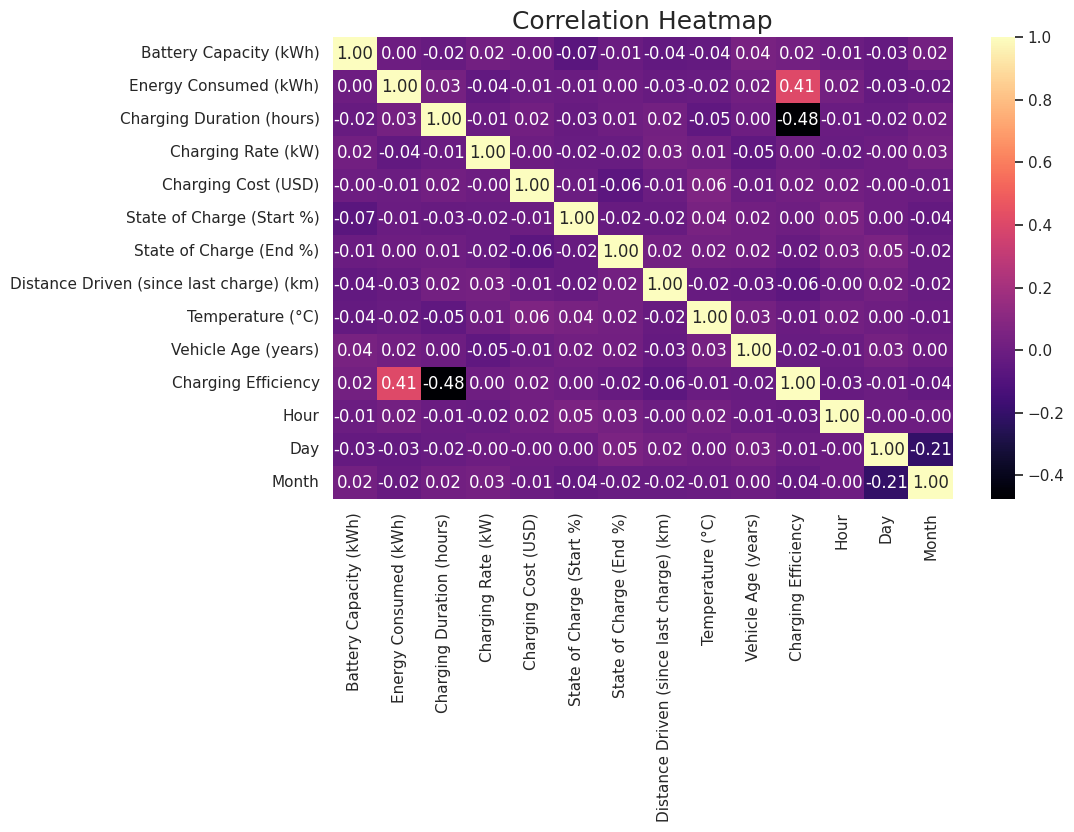

In [110]:
plt.figure(figsize=(10, 6))
corr_matrix = df_EV.drop(columns=['User ID', 'Vehicle Model', 'Charging Station ID', 'Charging Station Location', 'Charging Start Time', 'Charging End Time', 'Time of Day', 'Day of Week','Charger Type','User Type']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=18)

plt.show()

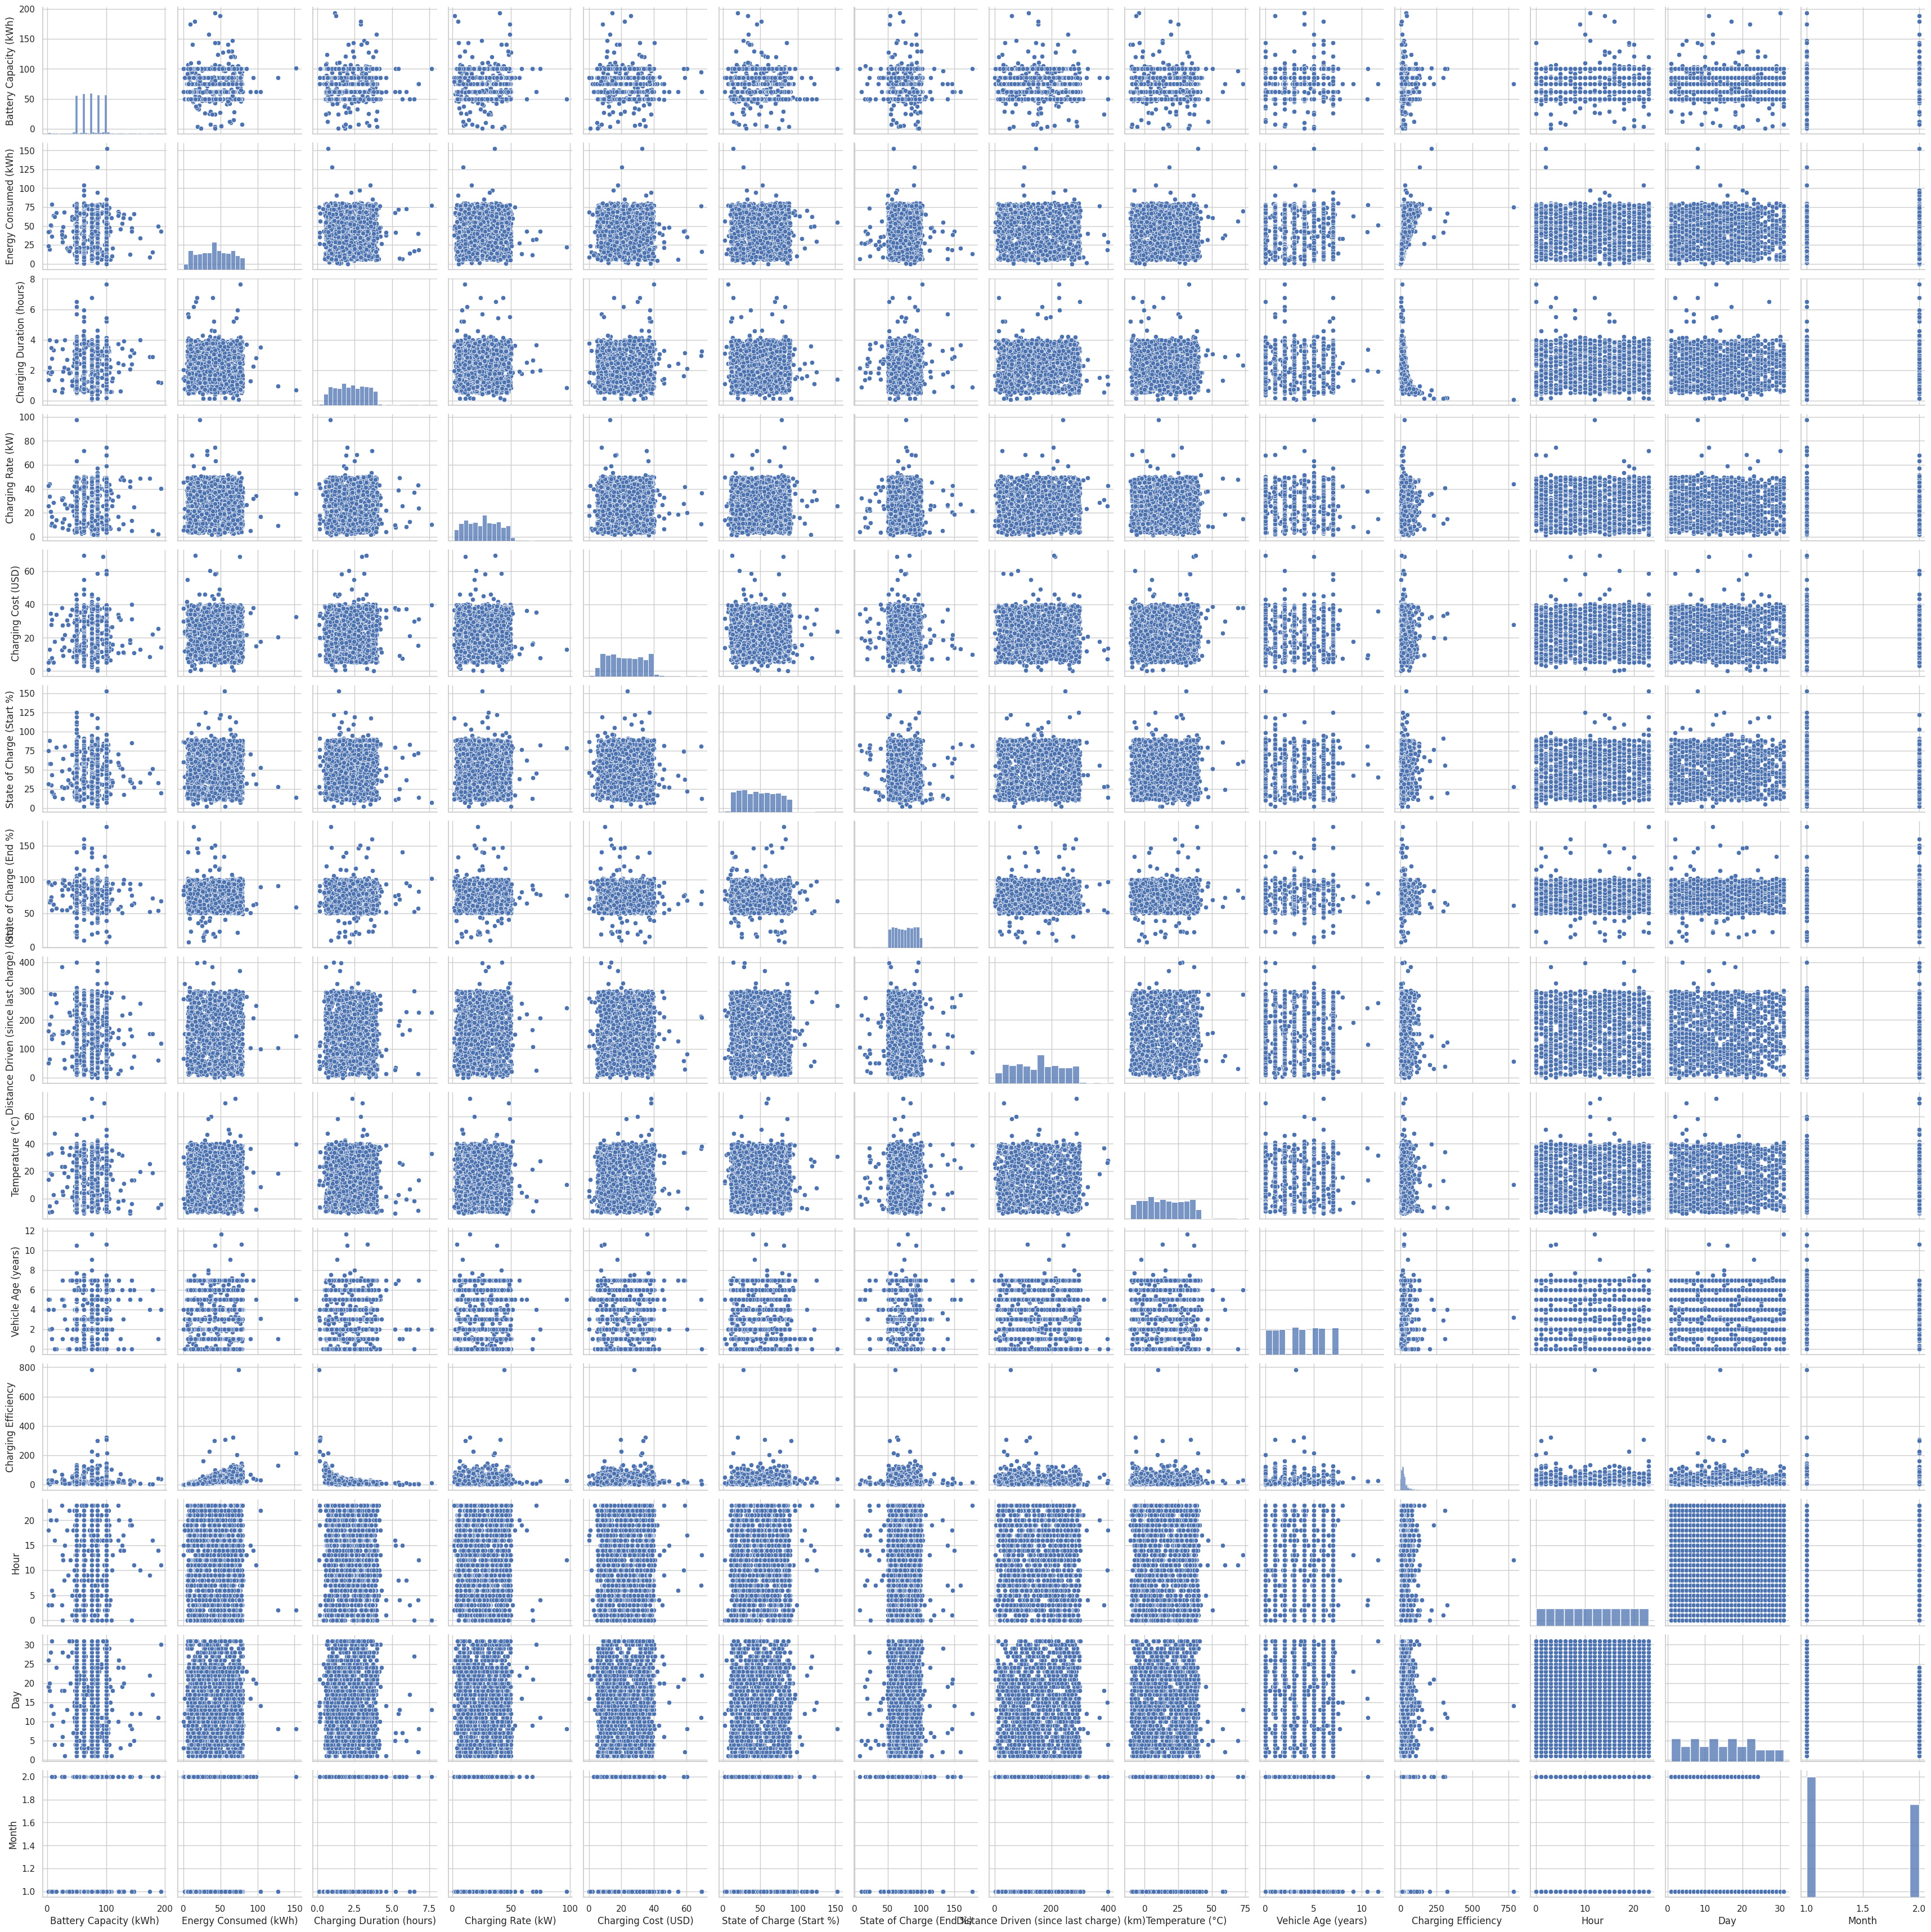

In [112]:
sns.pairplot(df_EV)